# Predicting Restaurant Menu Prices in the State of Texas

**Objective**

The goal of this project is to deliver data-driven strategic insights that help restaurant businesses strengthen their market position within the State of Texas. By leveraging detailed data on menu pricing, customer ratings, cuisine types, and regional demographics, this analysis uncovers key patterns in dining preferences, consumption trends, and menu composition across major Texan cities.

At the core of this project is a predictive modeling framework designed to estimate menu prices based on restaurant attributes and market factors unique to the Texas food landscape. These insights empower clients, whether launching new restaurant ventures or optimizing existing operations, to make informed decisions related to pricing, marketing, and expansion strategies tailored to the Texas market.

Ultimately, the project provides actionable recommendations aimed at improving visibility, enhancing customer engagement, and driving profitability in a highly competitive industry where margins typically range between 3 to 5 percent. By understanding the distinctive preferences and spending patterns of Texas consumers, restaurant businesses can position themselves for sustainable growth and long-term success across any food delivery or dine-in marketplace.

The source for this dataset is - "https://www.kaggle.com/code/annieiachien/uber-eats-restaurant-and-menu-data-analysis/input"

As the original dataset encompassed restaurants from across the country, the analysis was focused on the State of Texas to ensure efficient data processing and model performance. However, the predictive framework developed in this project is scalable and can be extended to other states as well.


#### The project follows a structured ML pipeline, including:
- [1. Data Loading](#1)
- [2. Exploratory Data Analysis](#2)
- [3. Train/Test split](#3)
- [4. Feature Engineering](#4)
- [5. Regression Modeling](#5)
- [6. Hyperparameter tuning](#6)
- [7. Selecting best model](#7)
- [8. Results](#8)

# 1. Data Loading

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
import pandas as pd
import numpy as np
import re,html
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_r = pd.read_csv('restaurants.csv')

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.3+ MB


In [6]:
df_r.describe()

,id,position,score,ratings,lat,lng
count,63469.00,63469.00,35302.00,35302.00,63469.00,63469.00
mean,31735.00,86.69,4.55,74.89,36.59,-96.72
std,18322.07,79.28,0.30,69.87,6.46,14.44
min,1.00,1.00,1.30,10.00,0.00,-123.84
25%,15868.00,18.00,4.40,25.00,30.44,-98.57
50%,31735.00,61.00,4.60,52.00,34.71,-96.76
75%,47602.00,141.00,4.80,100.00,40.88,-87.94
max,63469.00,300.00,5.00,500.00,48.96,0.00


#### Data dictionary Restaurant

|  Name  | Description  |  Type |
|:-------------:|:-------------:|:-----------:|
| **Id**  | Identification of All Restaurants.  | *Integer* |
| **Position**  | Exhibits the positioning on the search result of the restaurant according to their food category.  | *Integer* |
| **Name**  | Name of the Restaurant.  | *String* |
| **Score**  | The Scale of Restaurant Quality.  | *float* |
| **Ratings**  | Reviews acquired from the customer Experience.  | *float* |
| **Category**  | Type of food sold in the Restaurant.  | *String* |
| **Price Range**  | Range depicted in $-$$$ In-Expensive to Expensive.  | *String* |
| **Full Address**  | Address of the Restaurant.  | *String* |
| **Zip Code**  | Zip Code of the Restaurant.  | *String* |
| **Latitude**  | Latitude.  | *float* |
| **Longitude**  | Longitude.  | *float* |

In [7]:
df_rm=pd.read_csv('restaurant-menus.csv')

In [8]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 195.2+ MB


#### Data dictionary - Restaurant Menu

|  Name  | Description  |  Type |
|:-------------:|:-------------:|:-----------:|
| **Restaurant Id**  | Identification of All Restaurants.  | *Integer* |
| **Category**  | Restaurant's Food Category.  | *String* |
| **Name**  | Name of the Menu.  | *String* |
| **Description**  | Represents the Menu Description.  | *float* |
| **Price**  | Price per Menu Item.  | *float* |

Merging the two files based on id to get the restaurants and price for the dataset.

In [9]:
# Merging the data based on id's
df_master=df_r.merge(df_rm, left_on='id', right_on='restaurant_id', how="outer")

In [10]:
print("Number of rows and columns in the restaurant dataset")
print(df_master.shape)

Number of rows and columns in the restaurant dataset
(5117377, 16)


In [11]:
display(df_master.head(3))

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,name_y,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.56,-86.83,1.00,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.56,-86.83,1.00,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.56,-86.83,1.00,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD


Since the data is joined based on Outer Join property, we will filter out the Restaurant's that do not exist in the Restaurant Menu File.

In [12]:
df_master.isna().sum()

id                     0
position               0
name_x                 0
score            1958476
ratings          1958476
category_x          2499
price_range       602556
full_address       33745
zip_code           35024
lat                    0
lng                    0
restaurant_id        160
category_y           160
name_y               164
description      1452305
price                160
dtype: int64

In [13]:
df_master=df_master[~df_master['restaurant_id'].isnull()]

Drop non essential columns that will not be used for predicting the menu price of an Item('id','position', 'name_x','lat', 'lng', 'restaurant_id', 'description', 'category_y'.)

In [14]:
cols_to_drop=['id','position', 'name_x','lat', 'lng', 'restaurant_id', 'description', 'category_y']
df_master=df_master.drop(cols_to_drop, axis=1)

Standardizing the Column Names for Readability and Standards.

In [15]:
df_master.columns=[ 'score', 'review', 'restaurant_category','price_range','address', 'zip_code', 'item_name', 'menu_price']

Format the Menu price  - Remove USD from price and change the datatype to float and changing the datatype to float.

In [16]:
df_master["menu_price"] = df_master["menu_price"].str.replace("USD", "").str.strip().astype(float)

# 1. Exploratory Data Analysis <a id="2"></a>

Identify and drop duplicate rows from the df_master

In [17]:
df_master.duplicated().sum()

441072

In [18]:
# Dropping duplicates
df_master=df_master.drop_duplicates()

Identify and eliminate Null Data from df_master.

In [19]:
df_master.isna().sum()

score                  1812094
review                 1812094
restaurant_category       2429
price_range             557917
address                  26287
zip_code                 27561
item_name                    2
menu_price                   0
dtype: int64

In [20]:
df_master=df_master.dropna().reset_index(drop=True)

To ensure the dataset only contains relevant 'restaurant categories', we will exclude entries such as grocery, convenience, liquor stores, gifts, pharmacies, and other unrelated categories. These categories were identified as not representing actual restaurants and were removed from the restaurant_category column.

In [21]:
df_master = df_master.copy()

In [22]:
values_to_remove = "AÃ§aÃ­|AAPI-owned|Adult|Affordable Meals|Ameican|Baby|Bakery|BalkanBar / Pub Food|Candy|Cafe|ButcherShop|CarnicerÃ­a|chocolatier|Coffee & Tea|Coffee and Tea|Convenience|Convenience Store with Alcohol|Cupcakes|Deli|Donuts|Dount|Drinks|Everyday Essentials|florist|Flowers|Frozen Food|Frozen Yogurt|Gift Store|Gifts|Grocery|Home & Personal Care|Liquor Stores|MarketingCampaign|pet supplies|Pharmacy|Sandwhiches|Sandwich|Sanwiches"
df_master = df_master[~df_master['restaurant_category'].str.contains(values_to_remove, case=False, na=False)]

In [23]:
print("Number of rows and columns in TX restaurant dataset")
print(df_master.shape)

Number of rows and columns in TX restaurant dataset
(1475663, 8)


The dataset does not include a dedicated state column, we will derive it from the address field and to narrow the analysis to a specific state, we parse the address string and extracted the two-letter state abbreviation into a new column state.

In [24]:
# Extract State from Address
df_master['state'] = df_master['address'].str.extract(r',\s*([A-Z]{2})\s*,')

After extracting the state abbreviation, verify for null entries on state column and remove to ensure clean records with valid state information are retained.

In [25]:
df_master.isna().sum().sum()

4326

In [26]:
df_master=df_master.dropna().reset_index(drop=True)

Histogram to the plot the menu_price column to understand how menu_price's is distributed. The visualization shows the frequency of menu items within different price ranges. This helps in identifying the average price area and spotting common price points as well as detecting potential outliers (e.g., unusually high or low prices).

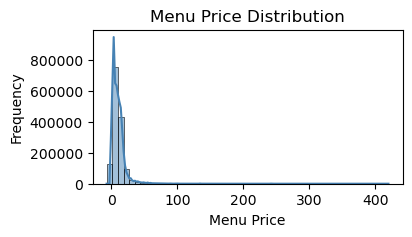

In [27]:
plt.figure(figsize=(4,2))
sns.histplot(df_master['menu_price'], kde=True, bins=50, color="steelblue")
plt.xlabel("Menu Price")
plt.ylabel("Frequency")
plt.title("Menu Price Distribution")
plt.show()

### Menu Price Distribution: Key Insights
- The histogram shows that the vast majority of menu items are priced at the lower end, mostly clustered below 20. This indicates that inexpensive restaurant food dominates the dataset.
- As the price increases, the frequency of items drops sharply, creating a right-skewed distribution. Only a very small number of items fall into higher price ranges - above 50 and beyond 100 dollars, which are outliers compared to the bulk of the data.
- Most restaurant food items belong to the low-cost price range less than 20 dollars.
- Mid-priced items between 20 and 50 dollars are much less common.
- This dataset has rare occurances for high end priced menu items, more than 100, can be considered outliers.

The bar chart shows how menu items are distributed across states. A few states have a much larger share of the data, while others are less represented.

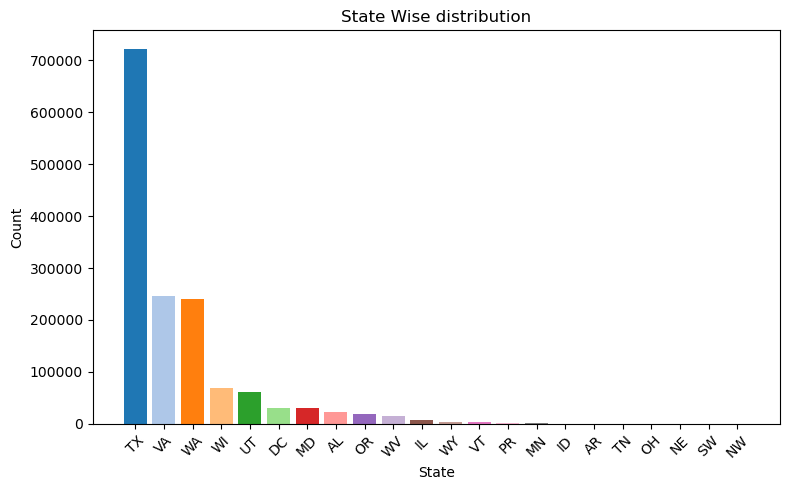

In [28]:
#Plot State wise distribution for Restaurant data
state_count=df_master['state'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(state_count.index, state_count.values, color=plt.cm.tab20.colors[:len(state_count)])
plt.title('State Wise distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight on State Distribution
- The plot shows that State of Texas (TX) overwhelmingly dominates the dataset, with far more records than any other state. While other states are represented, their counts are relatively small compared to Texas.
- considering the overall dataset size and computational limitations, the analysis and machine learning modeling will be focused on Texas data. This would ensure that the model is trained on a sufficient amount of data and avoiding performance issues from handling the full dataset across all states.

In [29]:
# Get only TX data from Master.
df_tx = df_master[df_master['state'] == 'TX']

We filtered the dataset to include only menu items priced under `$60` and limited restaurants to those up to the `$$$` tier, ensuring the focus remains on typical Uber Eats offerings while excluding extreme outliers and luxury categories.

In [30]:
# Filter to get only menu items lesser than $60
df_tx=df_tx[(df_tx['menu_price'] > 3) & (df_tx['menu_price'] < 61)]

In [31]:
print("Number of rows and columns in TX restaurant dataset")
print(df_tx.shape)

Number of rows and columns in TX restaurant dataset
(555069, 9)


In [32]:
df_tx.describe()

,score,review,menu_price
count,555069.00,555069.00,555069.00
mean,4.52,90.67,11.48
std,0.27,68.70,8.13
min,1.30,10.00,3.01
25%,4.40,37.00,5.99
50%,4.60,72.00,9.89
75%,4.70,130.00,14.00
max,5.00,500.00,60.99


Given that the menu price data is right-skewed, applying "log1p" to normalize the distribution and reduce the effect of extreme values.

In [33]:
# Applying Log1p
df_tx['menu_price'] = np.log1p(df_tx['menu_price'])

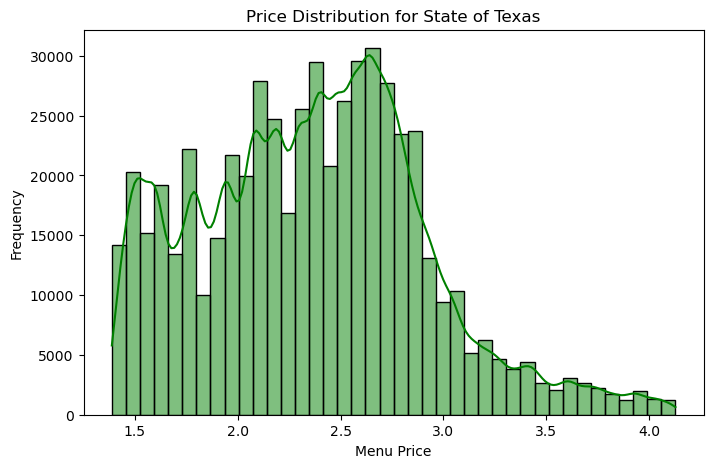

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df_tx['menu_price'], bins=40, color="green", kde=True)
plt.xlabel("Menu Price")
plt.ylabel("Frequency")
plt.title("Price Distribution for State of Texas")
plt.show()

### Insight on Log Transformation of Price Distribution for the State of TX
- The distribution of prices for Texas is now much closer to a normal distribution compared to the original right-skewed data.
- The transformation has compressed the high menu_price outliers there by reducing their impact on the analysis and training of the Models.
- Most of the transformed menu prices fall between approximately 1.5 and 3.0, which corresponds to about `$4.5` to `$20` in the raw dataset.

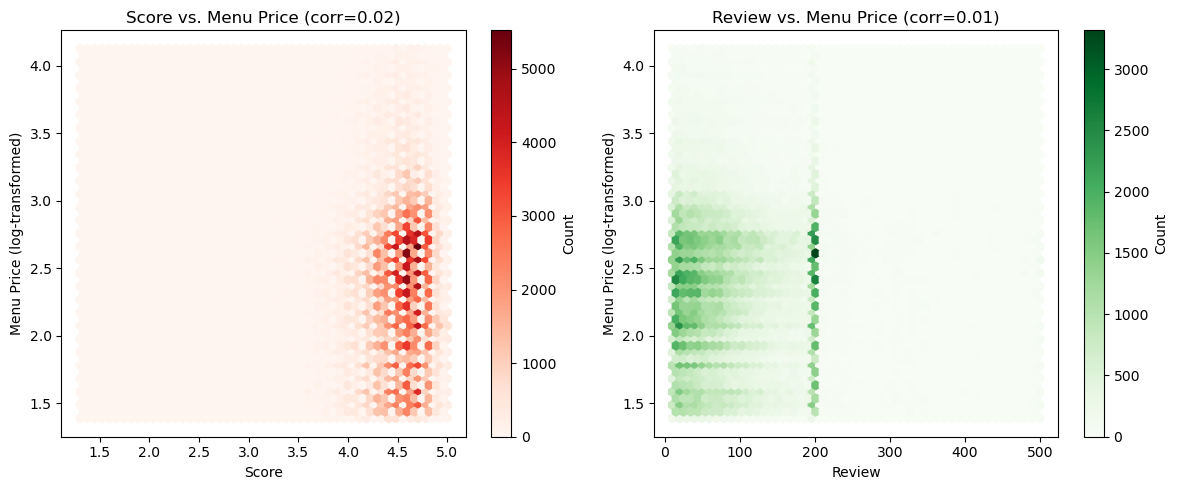

In [35]:
# Correlation of "score", "review" with menu price
corr_score = df_tx[['score', 'menu_price']].corr().loc['score', 'menu_price']
corr_review = df_tx[['review', 'menu_price']].corr().loc['review','menu_price']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hexbin: Score vs Menu Price
hb1 = axes[0].hexbin(df_tx['score'], df_tx['menu_price'], gridsize=50, cmap='Reds')
axes[0].set_title(f"Score vs. Menu Price (corr={corr_score:.2f})")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Menu Price (log-transformed)")
fig.colorbar(hb1, ax=axes[0], label="Count")

# Hexbin: Review vs Menu Price
hb2 = axes[1].hexbin(df_tx['review'], df_tx['menu_price'], gridsize=50, cmap='Greens')
axes[1].set_title(f"Review vs. Menu Price (corr={corr_review:.2f})")
axes[1].set_xlabel("Review")
axes[1].set_ylabel("Menu Price (log-transformed)")
fig.colorbar(hb2, ax=axes[1], label="Count")

plt.tight_layout()
plt.show()

### Insight on Correlation of Score and Review against the Menu Price
 - From the Above hexbin plots we can determine that, the correlation for both Score and Review is very weak (0.02 and 0.01) which is pretty close to Zero.
 - Both the plots show us that neither Score or Review will be helpful in predicting the Menu price.


In [36]:
# Clean up of Restaurant_Category Column
# Define regex pattern to match culture-related words
df_tx=df_tx.copy()
culture_pattern = re.compile(r'\b(?:American|Mexican|Italian|Greek|Chinese|Indian|Japanese|French|Spanish|Latin American|Mediterranean|Cuban|Caribbean|Middle Eastern|Cantonese|Asian Fusion|Asian|Black-owned|Soul Food)\b', re.IGNORECASE)
# Function to extract and replace culture in the 'category_of_restaurant' column
def extract_and_replace_culture(row):
    matches = culture_pattern.findall(str(row['restaurant_category']))
    return ', '.join(matches)
# Apply function to modify the 'category_of_restaurant'
df_tx['restaurant_category'] = df_tx.apply(extract_and_replace_culture, axis=1)
# Retain only the primary restaurant Category type
df_tx['restaurant_category'] = df_tx['restaurant_category'].str.split(',').str[0]
# Replace all blank values in 'restaurant_category' to null values
df_tx.replace('', np.nan, inplace = True)

In [37]:
# Check for Nulls after clean_up
df_tx.isna().sum()

score                      0
review                     0
restaurant_category    60940
price_range                0
address                    0
zip_code                   0
item_name                  0
menu_price                 0
state                      0
dtype: int64

In [38]:
# Dropping data from df_tx with nulls in restaurant category
df_tx.dropna(subset =['restaurant_category'], inplace = True)
df_tx.reset_index(drop=True, inplace=True)

In [39]:
df_tx['restaurant_category'].value_counts()

restaurant_category
American          225265
Mexican            89803
Asian              41299
Chinese            30601
Japanese           29551
Italian            23896
Indian             21200
Mediterranean       8033
Asian Fusion        6592
Black-owned         4804
Latin American      3880
Middle Eastern      2864
Caribbean           2287
Greek               1567
French              1201
Soul Food            914
Spanish              211
Cantonese            118
Cuban                 43
Name: count, dtype: int64

In [40]:
# Drop columns Address and State since The menu_price prediction is only for one State
df_tx = df_tx.drop(columns = ['address','state'])
df_tx = df_tx.copy()

In [41]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494129 entries, 0 to 494128
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                494129 non-null  float64
 1   review               494129 non-null  float64
 2   restaurant_category  494129 non-null  object 
 3   price_range          494129 non-null  object 
 4   zip_code             494129 non-null  object 
 5   item_name            494129 non-null  object 
 6   menu_price           494129 non-null  float64
dtypes: float64(3), object(4)
memory usage: 26.4+ MB


In [42]:
# Transform price range data
df_tx['price_range'].value_counts()

price_range
$       349230
$$      141587
$$$       3256
$$$$        56
Name: count, dtype: int64

In [43]:
#Map price range to a numerical Value
price_map = {
    "$": 1,
    "$$": 2,
    "$$$": 3,
    "$$$$": 4
}
df_tx['price_range'] = (
    df_tx['price_range']
    .map(price_map)
    .fillna(0)
    .astype(int)
)

In [44]:
df_tx['price_range'].value_counts()

price_range
1    349230
2    141587
3      3256
4        56
Name: count, dtype: int64

Item_name clean up for df_tx Dataframe

In [45]:
# standardize the item_name column name
df_tx['item_name'] = df_tx['item_name'].str.lower()

In [46]:
# Remove '&amp' from item_name.
import html
df_tx['item_name'] = df_tx['item_name'].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)

In [47]:
# Removal of prefix word such as "new"
df_tx['item_name'] = df_tx['item_name'].str.replace(r'^\s*new!\s*', '', case=False, regex=True).str.strip()

In [48]:
# After initial clean up validation of unique items available in the data
df_tx['item_name'].nunique()

130465

In [49]:
#Remove non-food items (fees, packaging, service charges, etc.) from df_tx
non_food_keywords = [
        "fee", "charge", "bag", "utensil", "cutlery", "promo", "discount",
        "tip", "tax", "delivery", "packaging", "service"
    ]
pattern_non_food = "|".join(non_food_keywords)
df_tx = df_tx[~df_tx['item_name'].str.lower().str.contains(pattern_non_food, na=False)]

In [50]:
# Removal of Duplicates - Remove repetitive menu items
df_tx = df_tx.drop_duplicates(subset=["zip_code", "item_name"])

In [51]:
df_tx.shape

(452880, 7)

In [52]:
# Check for all zipcodes in TX and having relevant data
df_tx['zip_code'].nunique()

741

In [53]:
# Change zip code to 3 string so that it can be grouped into broader regions rather than individual regions
df_tx = df_tx.copy()
df_tx['zip_code'] = df_tx['zip_code'].astype(str).str[:3]

In [54]:
df_tx['zip_code'].value_counts()

zip_code
750    74888
770    61507
782    40312
787    32320
774    26024
760    25611
752    24210
773    23970
761    23845
775    20785
786    13944
751    12096
799    11982
762    10512
785    10080
765     5400
794     5131
781     4998
797     2998
767     2763
757     2685
776     2290
784     2162
756     1833
777     1643
763     1550
796     1457
769     1074
754      942
755      870
779      833
798      569
759      483
783      351
780      272
US       140
795      103
766       76
790       60
000       36
753       23
793       20
Arl       17
444       15
Name: count, dtype: int64

In [55]:
# get only data for zip that has more that 10k records
df_final = df_tx[df_tx['zip_code'].isin(
    df_tx['zip_code'].value_counts()[lambda x: x > 10000].index
)]

In [56]:
# Cleaning up of item to Item_unit and Item_qty for One Hot Encoding
df_final['item_name'].value_counts()

item_name
onion rings                     293
french fries                    292
caesar salad                    254
spicy chicken sandwich combo    247
grilled chicken salad           242
                               ... 
d8. spicy noodle                  1
d7. cold noodle                   1
d6. spicy chicken                 1
d5. salmon teriyaki               1
lemonade jug                      1
Name: count, Length: 124905, dtype: int64

### Clean Up and Extraction of item_name column

In [57]:
from typing import Tuple, Union

# --- patterns ---
PAT_NUM_UNIT = re.compile(
    r'(?P<num>\d+(?:\.\d+)?|\d+\s*/\s*\d+)\s*'
    r'(?P<unit>oz|ounce|ounces|ml|g|kg|lb|lbs|pc|pcs|piece|pieces|pack|packs|bottle|bottles|liter|litre|l|"|in|inch|inches)\b',
    re.IGNORECASE
)
PAT_FRACTION       = re.compile(r'\b(\d+)\s*/\s*(\d+)\b')   # 1/2, 3/4 (mixes like 50/50 ignored)
PAT_AGE            = re.compile(r'\d+\+')                   # 55+, 21+
PAT_PERCENT        = re.compile(r'\d+\s*%')                 # 100%
PAT_END_NUMBER     = re.compile(r'\b\d+$')                  # Chicken 65
PAT_TRAILING_HASH  = re.compile(r'\s#\d+\b')                # " #313"

UNITS = r'(?:oz|ounce|ounces|ml|g|kg|lb|lbs|pc|pcs|piece|pieces|pack|packs|bottle|bottles|liter|litre|l|"|in|inch|inches)'
PAT_LEADING_INDEX  = re.compile(rf'^\s*(?:no\.?\s*)?\d{{1,4}}(?!\s*{UNITS})\s*[).:-]\s+', re.IGNORECASE)

# numeric inch size, supports ranges like 12-14"
PAT_SIZE_INCH = re.compile(
    r'(?P<sz>\d+(?:\.\d+)?)(?:\s*-\s*(?P<sz2>\d+(?:\.\d+)?))?\s*(?:"|in|inch|inches)\b',
    re.IGNORECASE
)

# descriptive size words
PAT_SIZE_WORD = re.compile(
    r'\b(xs|small|sm|medium|med|large|lg|xl|xxl|extra[-\s]?large|family|kids?|child|junior|jr\.?)\b',
    re.IGNORECASE
)

# unit normalization
UNIT_NORMALIZER = {
    'count':'ct',
    'ounce':'oz','ounces':'oz',
    'lbs':'lb',
    'pcs':'pc','piece':'pc','pieces':'pc',
    'packs':'pack',
    'bottles':'bottle',
    'liter':'l','litre':'l',
    '"':'inch','in':'inch','inch':'inch','inches':'inch'
}

# size label normalization
SIZE_NORMALIZER = {
    'xs':'xs',
    'sm':'small','small':'small',
    'med':'medium','medium':'medium',
    'lg':'large','large':'large',
    'xl':'xl','xxl':'xxl',
    'extra large':'xl','extra-large':'xl','x-large':'xl',
    'family':'family',
    'kid':'kids','kids':'kids','child':'kids','junior':'kids','jr':'kids','jr.':'kids'
}

def normalize_unit(u: str) -> str:
    u = u.lower()
    return UNIT_NORMALIZER.get(u, u)

def _to_number(s: str) -> float:
    s = s.strip()
    if '/' in s:
        a, b = s.split('/')
        b = float(b.strip())
        if b == 0:
            return 0.0
        return float(a.strip()) / b
    return float(s)

def extract_qty_unit_size_split(text) -> tuple[float, str, float, str]:
    """
    Returns (item_qty, item_unit, item_size_inch, item_size_label)
      - item_qty: numeric count (e.g., 2 from '2pc', 0.5 from '1/2'), 0.0 if none
      - item_unit: normalized unit (pc, oz, lb, l, inch) or 'unknown'
      - item_size_inch: float inches if found (avg for ranges), else 0.0
      - item_size_label: normalized label ('small','large','kids','family','xl', etc.) or ''
    """
    # base cleanup
    s = html.unescape(str(text)).strip()
    s = re.sub(r'\s+', ' ', s)
    s = PAT_LEADING_INDEX.sub('', s)     # drop "55." / "No. 7" etc.
    s = PAT_TRAILING_HASH.sub('', s)     # drop "#313"
    sl = s.lower()

    # defaults
    item_qty, item_unit = 0.0, 'unknown'
    item_size_inch: float = 0.0
    item_size_label: str = ''

    # ignore age markers & percentages
    if PAT_AGE.search(sl) or PAT_PERCENT.search(sl):
        return item_qty, item_unit, item_size_inch, item_size_label

    # label (keep even if inches also exist)
    mw = PAT_SIZE_WORD.search(sl)
    if mw:
        raw = mw.group(1).lower()
        item_size_label = SIZE_NORMALIZER.get(raw, raw)

    # numeric inches
    ms = PAT_SIZE_INCH.search(sl)
    if ms:
        sz1 = float(ms.group('sz'))
        sz2 = float(ms.group('sz2')) if ms.group('sz2') else None
        item_size_inch = (sz1 + sz2) / 2.0 if sz2 else sz1
        item_unit = 'inch'  # reflect that size context is inches

    # qty + unit (supports decimals/fractions)
    m = PAT_NUM_UNIT.search(sl)
    if m:
        qty = _to_number(m.group('num'))
        unit = normalize_unit(m.group('unit'))
        if unit == 'inch':
            # treat inches as size, not count
            if item_size_inch == 0.0:
                item_size_inch = qty
            item_qty, item_unit = 0.0, 'inch'
        else:
            item_qty, item_unit = qty, unit

    # fraction with no unit (1/2 sandwich) -> qty
    mf = PAT_FRACTION.search(sl)
    if mf and not item_qty:
        a, b = int(mf.group(1)), int(mf.group(2))
        if b != 0 and a != b:  # ignore mixes like 50/50
            item_qty = a / b

    # bare trailing number like 'Chicken 65' -> not qty
    if PAT_END_NUMBER.search(sl):
        return 0.0, 'unknown', item_size_inch, item_size_label

    return item_qty, item_unit, item_size_inch, item_size_label

# --- apply to your dataframe ---
df_final = df_final.copy()
df_final[['item_qty','item_unit','item_size_inch','item_size_label']] = (
    df_final['item_name'].apply(lambda x: pd.Series(extract_qty_unit_size_split(x)))
)

In [58]:
df_final['item_size_label'] = df_final['item_size_label'].replace('', 'unknown')

In [59]:
df_final.describe()

,score,review,price_range,menu_price,item_qty,item_size_inch
count,412086.00,412086.00,412086.00,412086.00,412086.00,412086.00
mean,4.52,94.22,1.31,2.38,0.89,0.01
std,0.26,69.75,0.48,0.55,11.35,0.37
min,1.30,10.00,1.00,1.39,0.00,0.00
25%,4.40,40.00,1.00,1.95,0.00,0.00
50%,4.60,76.00,1.00,2.40,0.00,0.00
75%,4.70,136.00,2.00,2.72,0.00,0.00
max,5.00,500.00,4.00,4.13,750.00,24.00


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412086 entries, 0 to 494128
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                412086 non-null  float64
 1   review               412086 non-null  float64
 2   restaurant_category  412086 non-null  object 
 3   price_range          412086 non-null  int32  
 4   zip_code             412086 non-null  object 
 5   item_name            412086 non-null  object 
 6   menu_price           412086 non-null  float64
 7   item_qty             412086 non-null  float64
 8   item_unit            412086 non-null  object 
 9   item_size_inch       412086 non-null  float64
 10  item_size_label      412086 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 36.2+ MB


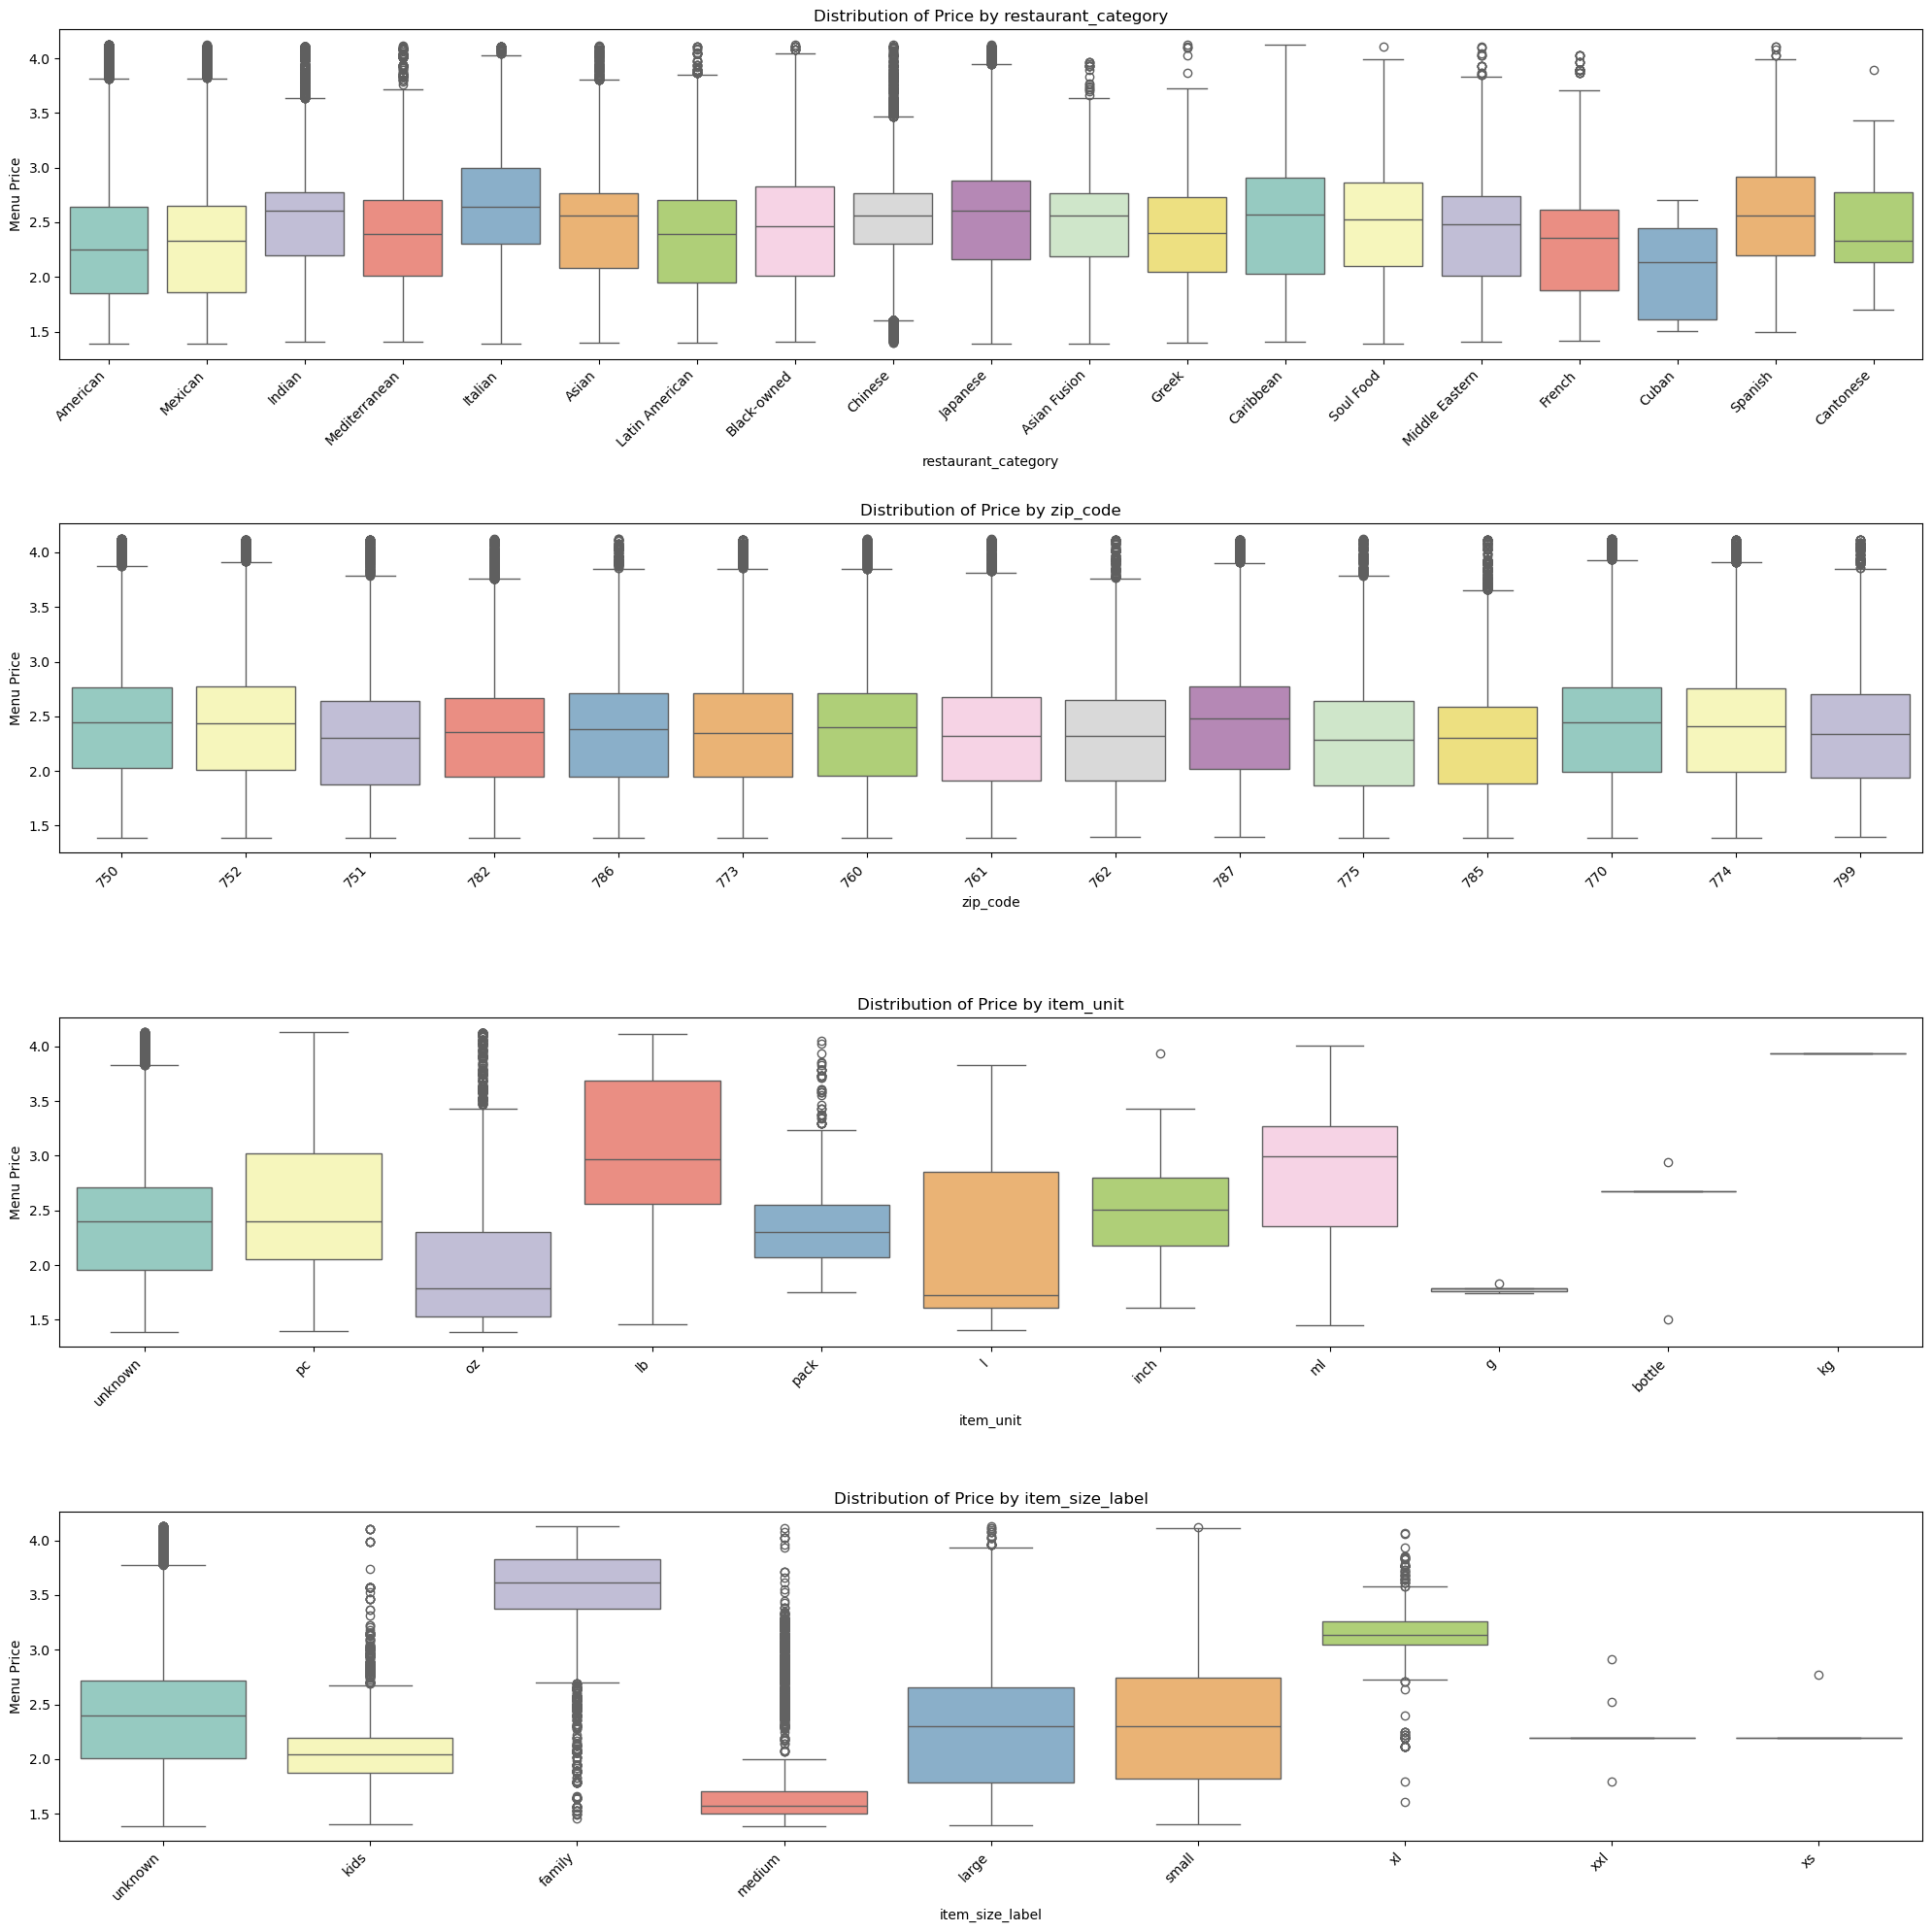

In [61]:
obj_columns = ['restaurant_category','zip_code','item_unit','item_size_label']
plt.figure(figsize=(20, len(obj_columns) * 5))

for i, col in enumerate(obj_columns, 1):
    plt.subplot(len(obj_columns), 1, i)
    sns.boxplot(data=df_final, x=col, y='menu_price',hue=col, palette='Set3', dodge=False, legend=False)
    #plt.xticks(rotation=90)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Menu Price")
    plt.title(f"Distribution of Price by {col}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

### Insight on Categorical Features
- restaurant_category: Prices vary meaningfully by cuisine—some (e.g., Italian/Japanese/Chinese) trend higher, while others sit lower and medians span roughly `$2–$3`.
- zip_code (zip3): Location shifts prices only modestly and medians differ a bit across zip3s, but spreads look similar.
- item_unit: Bigger units/packs (lb, ml, pack, bottle) are priced higher on average; small units like oz/g skew lower and kg is high but rare.
- item_size_label: Family/XL sizes are the most expensive; kids/small/medium are the cheapest and large sits in between.

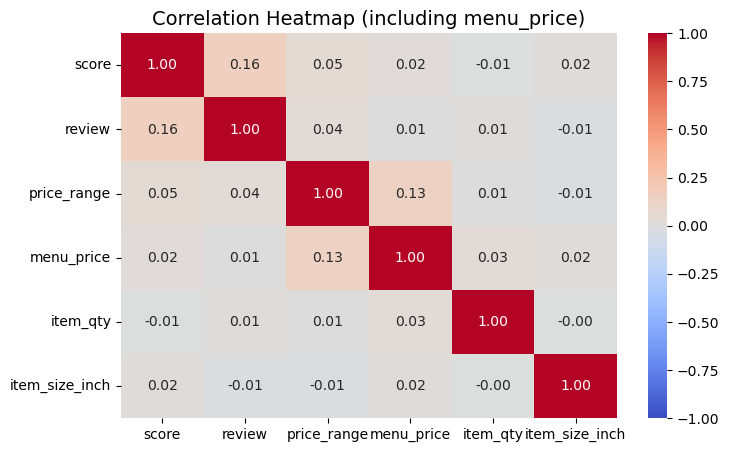

In [62]:
numeric_cols = ["score", "review", "price_range", "menu_price", "item_qty","item_size_inch"]
corr = df_final[numeric_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(
    corr,
    annot=True,       # show correlation values
    fmt=".2f",        # format to 2 decimals
    cmap="coolwarm",  # color scheme
    vmin=-1, vmax=1   # fix scale between -1 and 1
)
plt.title("Correlation Heatmap (including menu_price)", fontsize=14)
plt.show()

### Correlation Heat Map Summary for Numerical Features
- The heatmap shows that most numeric variables have very weak linear relationships with each other and with the target variable menu_price.
- The only mild correlation appears between price_range and menu_price (0.13), meaning higher menu prices are slightly associated with higher price-range categories.
-  score and review (0.16) also show a small positive link, suggesting better-rated restaurants tend to receive more reviews.
-  All other pairs show values close to zero, indicating low multicollinearity and minimal linear influence among numeric variables.

Overall, this suggests that numeric features alone are not strong predictors of menu price and emphasizing the importance of incorporating categorical and text-based features such as restaurant category, item name, and size details for improved model performance.

In [63]:
df_numeric = df_final.select_dtypes(include=['float64', 'int64'])

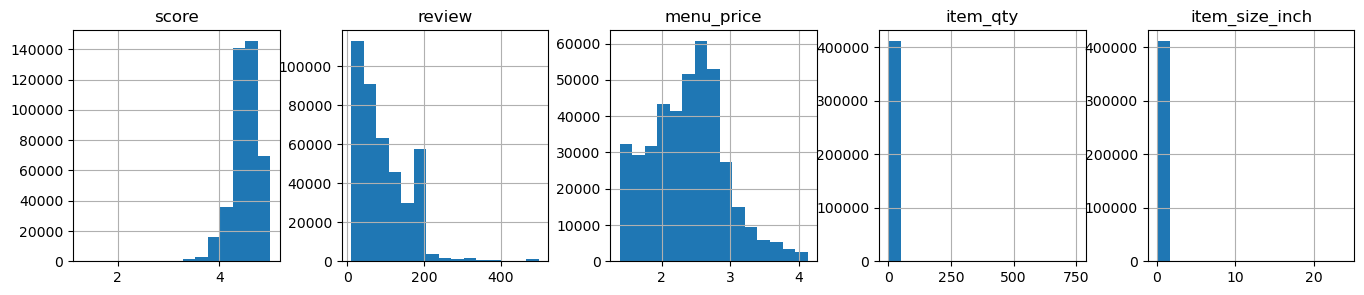

In [64]:
# Histograms for numerical variables
df_numeric.hist(bins=15, figsize=(20, 3), layout=(1, 6))
plt.show()

### Histogram Insights for Numerical Columns
- score: Most restaurants have scores clustered around 4, showing generally good customer ratings.
- review: Reviews are heavily concentrated at lower counts, meaning most places have only a few reviews.
- menu_price: Prices are slightly right-skewed, with most menu items in the lower-to-mid price range.
- item_qty: The quantity values are mostly 1 or very small, indicating single-item portions dominate.
- item_size_inch: Most items have no recorded size or very small size values, suggesting this feature is rarely specified.

# 3. Train/Test split <a id="3"></a>

Splitting your dataset is crucial to evaluate model generalization by ensuring that the model learns from a training set and is tested on a separate unseen test set, preventing overfitting and providing a reliable measure of performance on new data.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [66]:
X = df_final.drop(columns=['menu_price'])
y = df_final['menu_price']

“Given the dataset size of approximately 500,000 rows, and considering the computational requirements of the TF-IDF algorithm, a representative subset of 30,000 rows was sampled from the cleaned dataset (≈400,000 rows post-processing). This approach balances efficiency with model performance by reducing training time while still preserving sufficient data for meaningful analysis.”

In [67]:
# Take a sample size of 30k - because of computational limitations 
df_small = df_final.sample(n=30_000, random_state=42)

# 1) separate features/target
X = df_small.drop(columns=["menu_price"])
y = df_small["menu_price"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (21000, 10). Training labels size: (21000,)
Test set size: (9000, 10). Test labels size: (9000,)


# 4. Feature Engineering <a id="4"></a>

In [70]:
# Features Column Groups
num_cols = ['score', 'review', 'item_qty', 'item_size_inch']
cat_cols = ['restaurant_category', 'price_range', 'zip_code', 'item_unit', 'item_size_label']

text_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        ngram_range=(1, 1),
        max_features=20_000,
        min_df=5, max_df=0.9,
        dtype=float
    )),
    ("svd", TruncatedSVD(n_components=300, random_state=42))
])

In [71]:
# Pre Processor
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols),
        ('txt', text_pipe, 'item_name'),
    ],
    remainder='drop'
)

# 5. Regression Modeling <a id="5"></a>

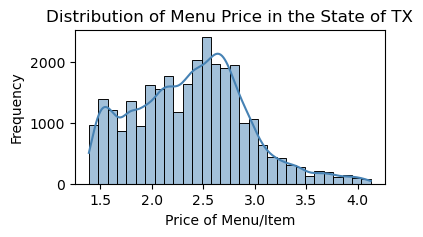

In [72]:
plt.figure(figsize=(4, 2))
sns.histplot(df_small['menu_price'], kde=True, bins=30, color="steelblue")

plt.xlabel("Price of Menu/Item")
plt.ylabel("Frequency")
plt.title("Distribution of Menu Price in the State of TX")

plt.show()

In [73]:
# Menu price represented in lograthimic value
df_small.menu_price.describe()

count   30000.00
mean        2.38
std         0.55
min         1.39
25%         1.95
50%         2.40
75%         2.73
max         4.13
Name: menu_price, dtype: float64

We will start with the following models:
- Linear Regression
- Lasso Regresion
- Decision Tree
- Random Forest
- XGBoost

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [75]:
print(X_train.shape)
print(X_test.shape)

(21000, 10)
(9000, 10)


In [76]:
# Function to calculate Y on dollar scale and use it in both Baseline as well as grid search calculation
def calc_on_dollar_scale(pipe, name, X_train, y_train, X_test, y_test):
    
    pipe.fit(X_train, y_train)

    # log-space predictions
    y_tr_pred_log = pipe.predict(X_train)
    y_te_pred_log = pipe.predict(X_test)

    # inverse-transform to $ scale
    y_tr = np.expm1(y_train)
    y_te = np.expm1(y_test)
    y_tr_pred = np.expm1(y_tr_pred_log)
    y_te_pred = np.expm1(y_te_pred_log)

    # metrics on original scale
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
    test_rmse  = np.sqrt(mean_squared_error(y_te, y_te_pred))
    train_r2   = r2_score(y_tr, y_tr_pred)
    test_r2    = r2_score(y_te, y_te_pred)

    row = {
        "Model": name,
        "Train RMSE": train_rmse,
        "Train R2":   train_r2,
        "Test RMSE":  test_rmse,
        "Test R2":    test_r2,
    }
    return row, y_tr_pred_log, y_te_pred_log

In [77]:
# Baseline Model 
lr_pipe = Pipeline([("preprocessing", preprocessor),
                    ("model", LinearRegression())])

ridge_pipe = Pipeline([("preprocessing", preprocessor),
                       ("model", Ridge(alpha=1.0))])

lasso_pipe = Pipeline([("preprocessing", preprocessor),
                       ("model", Lasso(alpha=0.01, max_iter=10_000))])

rf_pipe = Pipeline([("preprocessing", preprocessor),
                    ("model", RandomForestRegressor(
                        n_estimators=300, max_depth=20, max_features="sqrt",
                        min_samples_leaf=5, bootstrap=True, max_samples=0.5,
                        n_jobs=-1, random_state=42
                    ))])

xgb_pipe = Pipeline([("preprocessing", preprocessor),
                     ("model", XGBRegressor(
                         objective='reg:squarederror',
                         n_jobs=-1, random_state=42, tree_method='hist'
                     ))])

In [78]:
# Baseline Models
results = []
models = {
    "LinearRegression": lr_pipe,
    "Ridge": ridge_pipe,
    "Lasso": lasso_pipe,
    "RandomForest": rf_pipe,
    "XGBoost": xgb_pipe
}

In [79]:
# Baseline Calculation and Results
log_preds = {}  
for name, pipe in models.items():
    print(f"Training {name}...")
    row, tr_log, te_log = calc_on_dollar_scale(pipe, name, X_train, y_train, X_test, y_test)
    results.append(row)
    log_preds[name] = {"train_log_pred": tr_log, "test_log_pred": te_log}

results_df = pd.DataFrame(results)

Training LinearRegression...
Training Ridge...
Training Lasso...
Training RandomForest...
Training XGBoost...


In [80]:
pd.set_option('display.max_colwidth', None)
results_df

,Model,Train RMSE,Train R2,Test RMSE,Test R2
0,LinearRegression,6.45,0.38,6.33,0.36
1,Ridge,6.46,0.38,6.35,0.36
2,Lasso,8.03,0.04,7.78,0.04
3,RandomForest,5.18,0.60,5.75,0.47
4,XGBoost,3.42,0.83,5.21,0.57


### Model Performance Summary
| **Model**             | **Train RMSE** | **Train R²** | **Test RMSE** | **Test R²** | **Remarks**                                                                                             |
| :-------------------- | -------------: | -----------: | ------------: | ----------: | :------------------------------------------------------------------------------------------------------ |
| **Linear Regression** |           6.45 |         0.38 |          6.33 |        0.36 | While the baseline model provides a fair starting point, it shows moderate bias and lacks the flexibility to model non-linear trends.                         |
| **Ridge Regression**  |           6.46 |         0.38 |          6.35 |        0.36 | Performance is almost identical to Linear Regression, indicating that L2 regularization adds little benefit and that multicollinearity among features is likely low.   |
| **Lasso Regression**  |           8.03 |         0.04 |          7.78 |        0.04 | Due to strong regularization, the model’s coefficients are overly penalized, causing it to underfit the data.                       |
| **Random Forest**     |           5.18 |         0.60 |          5.75 |        0.47 | While the model successfully learns complex, non-linear relationships, a small performance drop on the test set indicates slight overfitting. |
| **XGBoost**           |       **3.42** |     **0.83** |      **5.21** |    **0.57** | Among all models, this one achieves the best results, demonstrating strong pattern recognition with a small degree of overfitting.               |

### Summary and Insights
- Best Model: XGBoost delivers the lowest Test RMSE (5.21) and highest Test R² (0.57), making it the most accurate and robust model for predicting menu prices.
- Tree-based models (Random Forest, XGBoost) significantly outperform linear models, indicating that non-linear and interaction effects play a key role in price prediction.
- Linear, Ridge, and Lasso models show limited explanatory power (R² ≈ 0.36 or below), suggesting linear assumptions alone are insufficient.
- Lasso Regression performs the weakest, likely due to aggressive regularization that shrinks too many coefficients toward zero.
- XGBoost’s generalization gap (Train R² = 0.83 → Test R² = 0.57) implies mild overfitting — fine-tuning hyperparameters like max_depth, learning_rate, and n_estimators could improve stability.

### Recommendations based on the Intitial Baseline Results
- Hyperparameter Tuning: Apply GridSearchCV or RandomizedSearchCV on XGBoost and RandomForest to optimize learning rate, tree depth, and number of estimators.
- Regularization Control: XGBoost’s overfitting can be curbed by ending training at the optimal iteration and using a smaller, representative data sample.
- Feature Engineering: Normalize skewed variables such as applying log1p(price)) and leverage text features (TF-IDF on item_names) to improve predictive signal.
- Model Validation: Perform cross-validation with parameters (K-Fold = 5 or 10) for robust error estimation.

Best model based on lowest Test RMSE: XGBoost


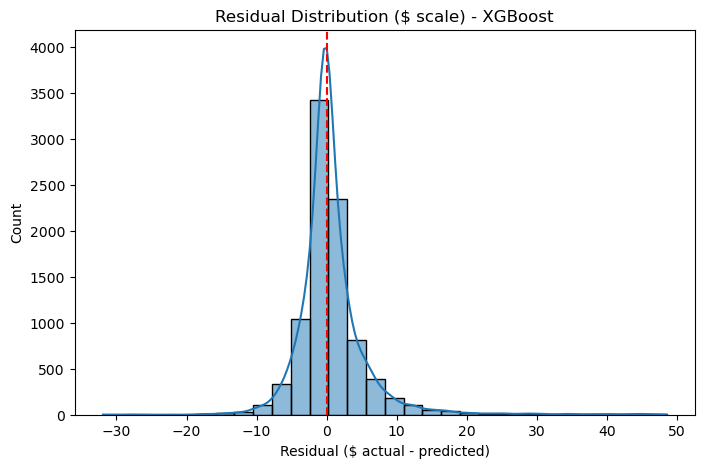

In [81]:
best_row = results_df.loc[results_df["Test RMSE"].idxmin()]  
best_model_name = best_row["Model"]
print(f"Best model based on lowest Test RMSE: {best_model_name}")
y_test_dollar = np.expm1(y_test)
y_pred_best_dollar = np.expm1(log_preds[best_model_name]["test_log_pred"])
residuals_dollar = y_test_dollar - y_pred_best_dollar

plt.figure(figsize=(8,5))
sns.histplot(residuals_dollar, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual ($ actual - predicted)")
plt.title(f"Residual Distribution ($ scale) - {best_model_name}")
plt.show()

### Residual Distribution XGBoost Insights
The residual distribution shows that prediction errors are centered closely around zero, indicating that the XGBoost model’s estimates are largely unbiased. The shape is roughly bell-curved, with most residuals falling within `$10 and $-10`, suggesting strong accuracy and consistent generalization. A few outliers on the right tail indicate occasional under-predictions for higher-priced items, but overall, the model captures the pricing pattern effectively with low variance and minimal systematic error.

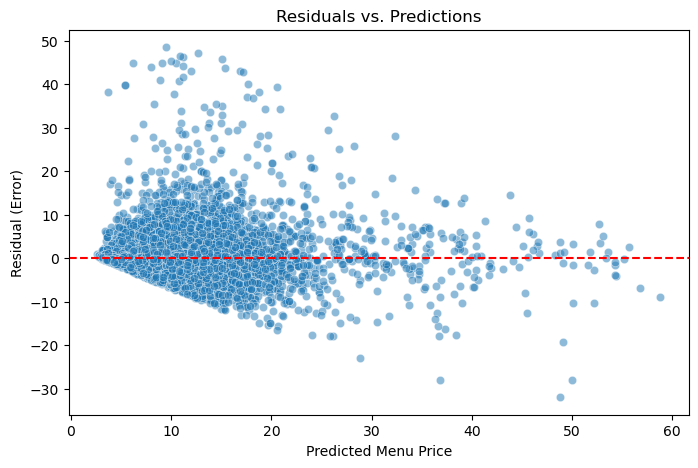

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best_dollar, y=residuals_dollar, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Menu Price")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

### Residuals vs. Predictions - XGBoost Model
The residuals are randomly scattered around the zero line, showing that the XGBoost model doesn’t have a consistent bias and it predicts both higher and lower prices fairly evenly. Most predictions are close to actual values, with small deviations across the price range. The errors spread out slightly more for cheaper items, showing the model is a bit less consistent at the lower end, but overall it captures the pricing patterns well, with only a few under-predicted high-value items.

# 6. Hyperparameter Tuning <a id="6"></a>

In [83]:
grids = {
    "Ridge": {
        "pipe": Pipeline([
            ("preprocessing", preprocessor),
            ("model", Ridge())
        ]),
        "params": {"model__alpha": [0.01, 0.1, 1, 10, 100]}
    },
    "Lasso": {
        "pipe": Pipeline([
            ("preprocessing", preprocessor),
            ("model", Lasso(max_iter=10_000))
        ]),
        "params": {"model__alpha": [0.001, 0.01, 0.1, 1, 10]}
    },
    "XGBoost": {
        "pipe": Pipeline([
            ("preprocessing", preprocessor),
            ("model", XGBRegressor(
                objective="reg:squarederror",
                n_jobs=-1, random_state=42, tree_method='hist'
            ))
        ]),
        "params": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [3, 5, 7],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

grid_results = []

for name, cfg in grids.items():
    print(f"Grid searching {name}...")
    
    gs = GridSearchCV(
        cfg["pipe"], cfg["params"],
        cv=3, n_jobs=-1,
        scoring="neg_mean_squared_error"
    )
    
    gs.fit(X_train, y_train)  

    best_pipe = gs.best_estimator_
    row, tr_log, te_log = calc_on_dollar_scale(best_pipe, name, X_train, y_train, X_test, y_test)
    
    # add CV result summary
    row.update({
        "Best Params": gs.best_params_,
        "CV MSE": gs.best_score_
    })
    grid_results.append(row)

results_hyp_df = pd.DataFrame(grid_results)
print(results_hyp_df)

Grid searching Ridge...
Grid searching Lasso...
Grid searching XGBoost...
     Model  Train RMSE  Train R2  Test RMSE  Test R2  \
0    Ridge        6.46      0.38       6.35     0.36   
1    Lasso        7.18      0.23       7.02     0.22   
2  XGBoost        3.31      0.84       5.06     0.59   

                                                                        Best Params  \
0                                                               {'model__alpha': 1}   
1                                                           {'model__alpha': 0.001}   
2  {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}   

   CV MSE  
0   -0.17  
1   -0.21  
2   -0.12  


In [84]:
pd.set_option('display.max_colwidth', None)
results_hyp_df.sort_values(['Test RMSE', 'Test R2'], ascending=[True,False])

,Model,Train RMSE,Train R2,Test RMSE,Test R2,Best Params,CV MSE
2,XGBoost,3.31,0.84,5.06,0.59,"{'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}",-0.12
0,Ridge,6.46,0.38,6.35,0.36,{'model__alpha': 1},-0.17
1,Lasso,7.18,0.23,7.02,0.22,{'model__alpha': 0.001},-0.21


# 7. Selecting best model <a id="7"></a>

In [85]:
from sklearn.model_selection import cross_val_score, KFold

In [86]:
best_model = xgb_pipe = Pipeline([
    ("preprocessing", preprocessor),
    ("xgb", XGBRegressor(learning_rate= 0.1, max_depth=7, n_estimators=200,objective="reg:squarederror",
        n_jobs=-1,
        random_state=42))
])
cv = KFold(n_splits=5, shuffle=True, random_state=42)

y_train_org = np.expm1(y_train)
y_test_org  = np.expm1(y_test)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_train = np.sqrt(-cross_val_score(best_model, X_train, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
cv_r2_train = cross_val_score(best_model, X_train, y_train, scoring="r2", cv=cv, n_jobs=-1)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_org = np.expm1(y_pred)

rmse_test = np.sqrt(mean_squared_error(y_test_org, y_pred_org))
r2_test = r2_score(y_test_org, y_pred_org)

ModelResults = {
    "Model": "XGBoost",
    "CV RMSE Mean": np.mean(cv_rmse_train),
    "CV RMSE Std": np.std(cv_rmse_train),
    "CV R² Mean": np.mean(cv_r2_train),
    "CV R² Std": np.std(cv_r2_train),
    "RMSE Test": rmse_test,
    "R² Test": r2_test
}

BestModelResults=pd.DataFrame([ModelResults])

In [87]:
pd.set_option('display.max_colwidth', None)
BestModelResults

,Model,CV RMSE Mean,CV RMSE Std,CV R² Mean,CV R² Std,RMSE Test,R² Test
0,XGBoost,0.33,0.00,0.63,0.00,5.06,0.59


# 8. Results <a id="8"></a>

### Main takeaway

Machine learning models, particularly XGBoost and Random Forest, effectively predict menu prices using both structured and text-based restaurant features. Text signals from item_name, combined with categorical and numerical context, significantly improve predictive accuracy.

### Conclusions

- Combining structured and unstructured data improves prediction reliability.
- Log-transformation stabilized price skewness and boosted accuracy.
- Tree-based models outperformed linear ones due to non-linear relationships.
- The methodology is scalable and generalizable beyond Texas.

### Business Recommendations

For customers and entrepreneurs exploring restaurant opportunities in Texas:
- **Cuisine Strategy:** Invest in cuisines showing strong customer retention and value alignment (e.g., fast casual, coffee, local comfort food).
- **Regional Pricing:** Assess ZIP-code clusters; urban and high-density areas support premium pricing.
- **Menu Planning:** Use model insights to price competitively without undervaluing popular items.
- **Market Gaps:** Identify categories with low supply but high predicted price stability.

### Future Enhancements

- Can Expand application to **nationwide data** for cross-state comparison.
- Can Integrate **time-series or seasonal features** for dynamic pricing.
- Upgrade text modeling using **BERT or Word2Vec embeddings**.
- Can Build  **interactive dashboard** for visualization.